In [1]:
import os
import pandas as pd
from datetime import datetime, timedelta
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import QuantileTransformer

In [3]:
train_file = 'train_data.csv'
test_file = 'test_data.csv'

data_path = '/opt/ml/input/data/train_dataset'
train_path = os.path.join(data_path, train_file)
test_path = os.path.join(data_path, test_file)

In [4]:
train_df = pd.read_csv(train_path, parse_dates=['Timestamp'])
test_df = pd.read_csv(test_path, parse_dates=['Timestamp'])

# EDA

In [5]:
df = train_df.copy()
df['tmp_index'] = df.index
tmp_df = df[['userID', 'testId', 'Timestamp', 'tmp_index']].shift(1)
tmp_df['tmp_index'] += 1
tmp_df = tmp_df.rename(columns={'Timestamp':'prior_timestamp'})
df = df.merge(tmp_df, how='left', on=['userID', 'testId', 'tmp_index'])
df['prior_elapsed'] = (df.Timestamp - df.prior_timestamp).dt.seconds

In [14]:
upper_bound = df['prior_elapsed'].quantile(0.98) # outlier 설정
median = df[df['prior_elapsed'] <= upper_bound]['prior_elapsed'].median() 
df.loc[df['prior_elapsed'] > upper_bound, 'prior_elapsed'] = median 
df['prior_elapsed'] = df['prior_elapsed'].fillna(median) # 빈값 채우기

<AxesSubplot:>

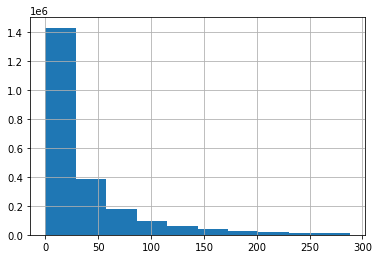

In [15]:
df.prior_elapsed.hist()

In [16]:
df['prior_elapsed_log'] = np.log1p(df['prior_elapsed'])

<AxesSubplot:>

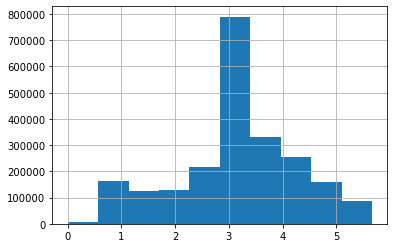

In [17]:
df.prior_elapsed_log.hist()

In [20]:
df['prior_elapsed_quantile'] = QuantileTransformer(output_distribution='normal').fit_transform(df.prior_elapsed.values.reshape(-1,1)).reshape(-1)

<AxesSubplot:>

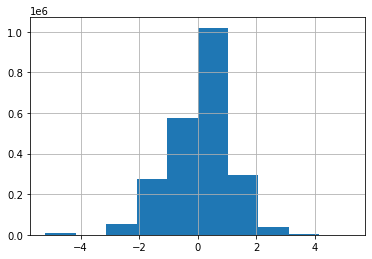

In [21]:
df.prior_elapsed_quantile.hist()